In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import regex as re
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection,linear_model
from sklearn.metrics import r2_score

In [ ]:
full_df=pd.read_csv("car details v4.csv")

In [ ]:
msno.matrix(full_df)

In [ ]:
full_df.info()

In [ ]:
train_df, test_df = train_test_split(full_df, test_size=0.2) # 80% train, 20% test

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [30]:
def extract_engine_capacity(row):
    if pd.isna(row['Engine']):
        match = re.search(r'\b(\d+\.\d+)\b', row['Model'])
        if match:
            return str(int(float(match.group(1))*1000))+" cc"
        else:
            return np.NaN
    return row['Engine']

train_df['Engine'] = train_df.apply(extract_engine_capacity, axis=1)

In [31]:
def extract_drivetrain(group):
    mode_value = group['Drivetrain'].mode().iloc[0]
    return group.fillna({'Drivetrain': mode_value})

train_df = train_df.groupby('Make').apply(extract_drivetrain)

KeyError: 'Drivetrain'

In [ ]:
train_df = train_df.dropna()

In [32]:
train_df[['bhp', 'rpm power']] = train_df['Max Power'].str.split('@', expand=True)
train_df['bhp'] = train_df['bhp'].str.replace(' bhp', '').str.strip()
train_df['rpm power'] = train_df['rpm power'].str.replace(' rpm', '').str.strip()

In [33]:
train_df[['Nm', 'rpm torque']] = train_df['Max Torque'].str.split('@', expand=True)
train_df['Nm'] = train_df['Nm'].str.replace(' Nm', '').str.strip()
train_df['rpm torque'] = train_df['rpm torque'].str.replace(' rpm', '').str.strip()

In [15]:
train_df.drop(['Max Power', 'Max Torque'], axis=1)
train_df.head()

Make                         Model    Price  Year  Kilometer  \
Make                                                                      
Audi 958   Audi  A7 Sportback 3.0 TDI quattro  2600000  2012      42000   
     1617  Audi       A6 2.0 TDI Premium Plus  1450000  2014      58000   
     1096  Audi  Q3 35 TDI quattro Technology  3250000  2019      41000   
     605   Audi   A3 35 TDI Premium + Sunroof  2900000  2019      15530   
     728   Audi            A6 2.0 TDI Premium  1500000  2014      69000   

          Fuel Type Transmission   Location  Color   Owner  ... Drivetrain  \
Make                                                        ...              
Audi 958     Diesel    Automatic    Lucknow  White   First  ...        AWD   
     1617    Diesel    Automatic      Delhi  Black  Second  ...        FWD   
     1096    Diesel    Automatic  Hyderabad  White  Second  ...        AWD   
     605     Diesel    Automatic        Goa  White   First  ...        FWD   
     728     Diesel    Automatic     Mohali   Blue   First  ...        FWD   

           Length   Width  Height Seating Capacity  Fuel Tank Capacity  bhp  \
Make                                                                          
Audi 958   4969.0  2139.0  1420.0              5.0                65.0  241   
     1617  4915.0  1874.0  1455.0              5.0                65.0  177   
     1096  4385.0  1831.0  1608.0              5.0                64.0  184   
     605   4456.0  1796.0  1416.0              5.0                50.0  141   
     728   4915.0  1874.0  1455.0              5.0                65.0  177   

           rpm power   Nm  rpm torque  
Make                                   
Audi 958        4000  500        1400  
     1617       3750  380        1750  
     1096       3500  380        1750  
     605        3500  320        1750  
     728        3750  380        1750  

[5 rows x 24 columns]

<Axes: >

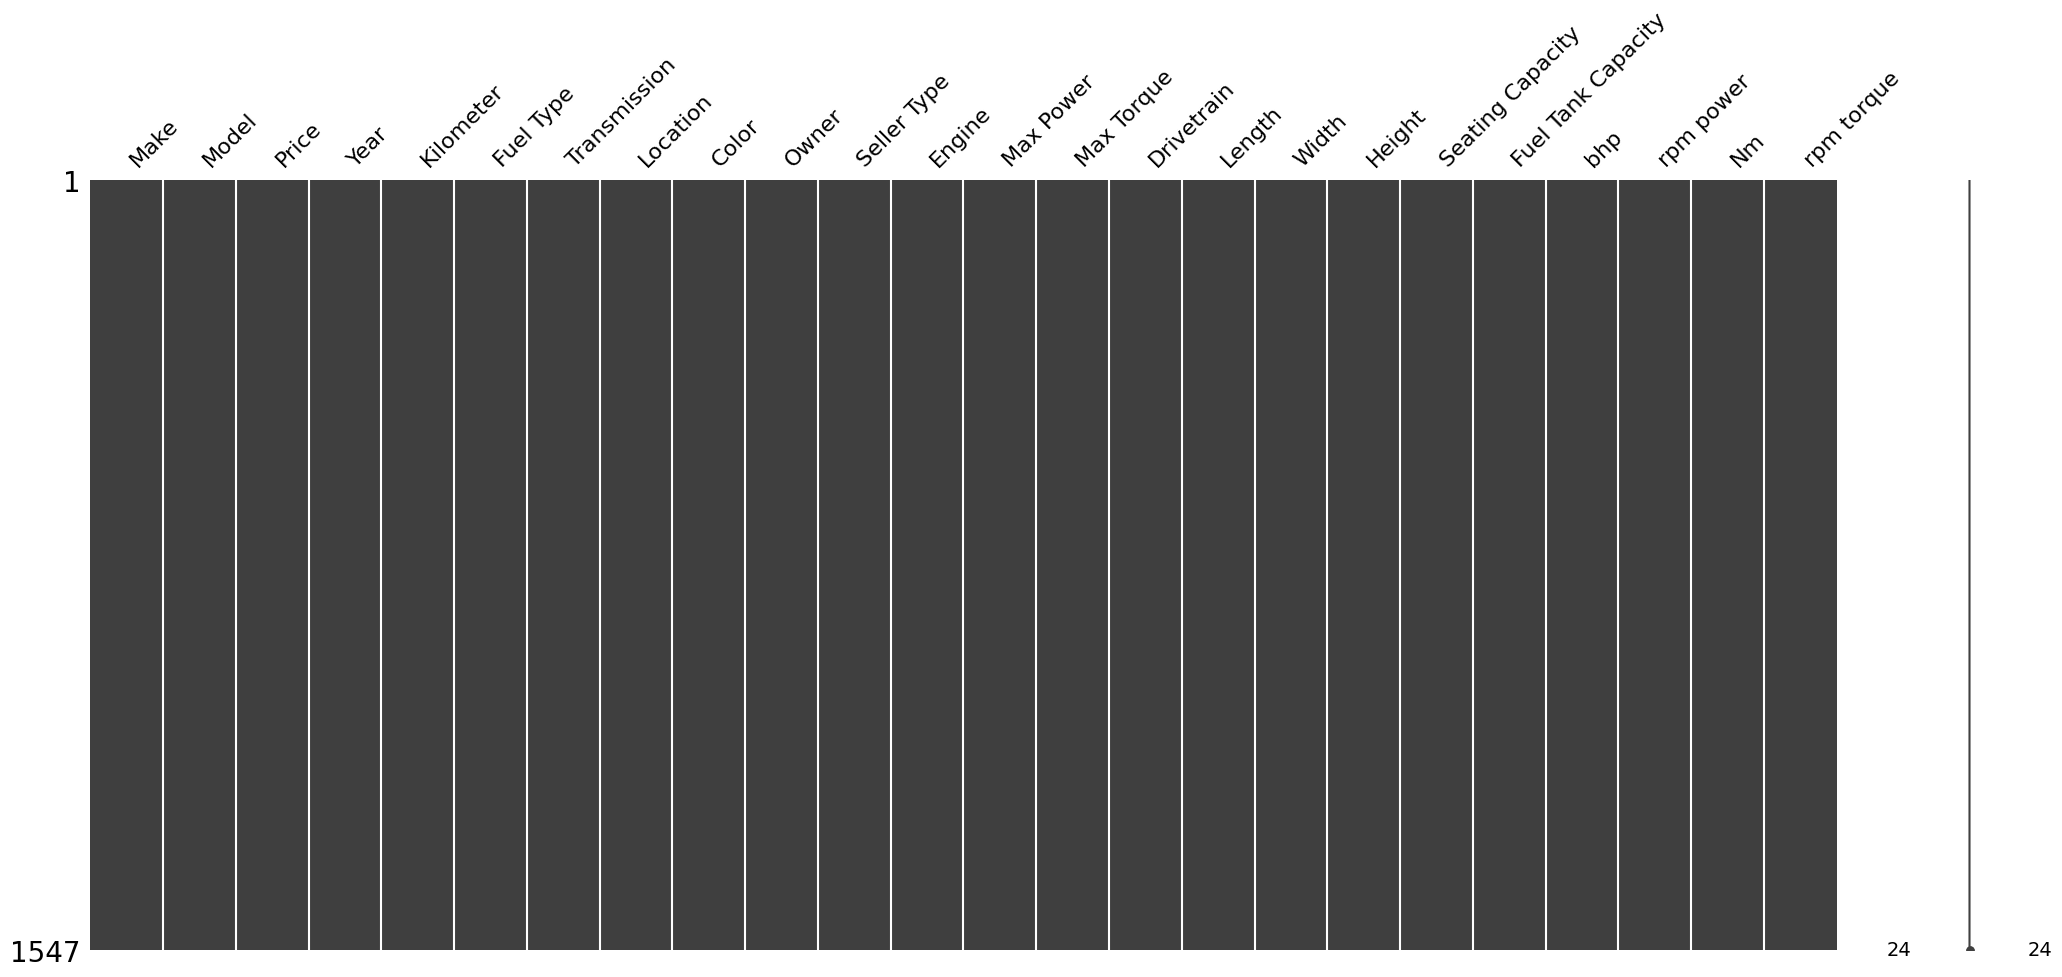

In [16]:
msno.matrix(train_df)

In [17]:
def one_hot_encode(df, columns): #unused, but valid for explanation
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [18]:
train_df = pd.get_dummies(train_df, columns=['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'])

In [19]:
train_df.head()

Model    Price  Year  Kilometer   Engine  \
Make                                                                         
Audi 958   A7 Sportback 3.0 TDI quattro  2600000  2012      42000  2967 cc   
     1617       A6 2.0 TDI Premium Plus  1450000  2014      58000  1968 cc   
     1096  Q3 35 TDI quattro Technology  3250000  2019      41000  1968 cc   
     605    A3 35 TDI Premium + Sunroof  2900000  2019      15530  1968 cc   
     728             A6 2.0 TDI Premium  1500000  2014      69000  1968 cc   

                    Max Power         Max Torque  Length   Width  Height  ...  \
Make                                                                      ...   
Audi 958   241 bhp @ 4000 rpm  500 Nm @ 1400 rpm  4969.0  2139.0  1420.0  ...   
     1617  177 bhp @ 3750 rpm  380 Nm @ 1750 rpm  4915.0  1874.0  1455.0  ...   
     1096  184 bhp @ 3500 rpm  380 Nm @ 1750 rpm  4385.0  1831.0  1608.0  ...   
     605   141 bhp @ 3500 rpm  320 Nm @ 1750 rpm  4456.0  1796.0  1416.0  ...   
     728   177 bhp @ 3750 rpm  380 Nm @ 1750 rpm  4915.0  1874.0  1455.0  ...   

           Owner_Fourth  Owner_Second Owner_Third Owner_UnRegistered Car  \
Make                                                                       
Audi 958          False         False       False                  False   
     1617         False          True       False                  False   
     1096         False          True       False                  False   
     605          False         False       False                  False   
     728          False         False       False                  False   

          Seller Type_Commercial Registration Seller Type_Corporate  \
Make                                                                  
Audi 958                                False                 False   
     1617                               False                 False   
     1096                               False                 False   
     605                                False                 False   
     728                                False                 False   

           Seller Type_Individual  Drivetrain_AWD  Drivetrain_FWD  \
Make                                                                
Audi 958                     True            True           False   
     1617                    True           False            True   
     1096                    True            True           False   
     605                     True           False            True   
     728                     True           False            True   

           Drivetrain_RWD  
Make                       
Audi 958            False  
     1617           False  
     1096           False  
     605            False  
     728            False  

[5 rows x 159 columns]

In [20]:
year_mapping = {year: index for index, year in enumerate(sorted(train_df['Year'].unique()))}
train_df['Year'] = train_df['Year'].map(year_mapping)

In [21]:
train_df.head()

Model    Price  Year  Kilometer   Engine  \
Make                                                                         
Audi 958   A7 Sportback 3.0 TDI quattro  2600000     7      42000  2967 cc   
     1617       A6 2.0 TDI Premium Plus  1450000     9      58000  1968 cc   
     1096  Q3 35 TDI quattro Technology  3250000    14      41000  1968 cc   
     605    A3 35 TDI Premium + Sunroof  2900000    14      15530  1968 cc   
     728             A6 2.0 TDI Premium  1500000     9      69000  1968 cc   

                    Max Power         Max Torque  Length   Width  Height  ...  \
Make                                                                      ...   
Audi 958   241 bhp @ 4000 rpm  500 Nm @ 1400 rpm  4969.0  2139.0  1420.0  ...   
     1617  177 bhp @ 3750 rpm  380 Nm @ 1750 rpm  4915.0  1874.0  1455.0  ...   
     1096  184 bhp @ 3500 rpm  380 Nm @ 1750 rpm  4385.0  1831.0  1608.0  ...   
     605   141 bhp @ 3500 rpm  320 Nm @ 1750 rpm  4456.0  1796.0  1416.0  ...   
     728   177 bhp @ 3750 rpm  380 Nm @ 1750 rpm  4915.0  1874.0  1455.0  ...   

           Owner_Fourth  Owner_Second Owner_Third Owner_UnRegistered Car  \
Make                                                                       
Audi 958          False         False       False                  False   
     1617         False          True       False                  False   
     1096         False          True       False                  False   
     605          False         False       False                  False   
     728          False         False       False                  False   

          Seller Type_Commercial Registration Seller Type_Corporate  \
Make                                                                  
Audi 958                                False                 False   
     1617                               False                 False   
     1096                               False                 False   
     605                                False                 False   
     728                                False                 False   

           Seller Type_Individual  Drivetrain_AWD  Drivetrain_FWD  \
Make                                                                
Audi 958                     True            True           False   
     1617                    True           False            True   
     1096                    True            True           False   
     605                     True           False            True   
     728                     True           False            True   

           Drivetrain_RWD  
Make                       
Audi 958            False  
     1617           False  
     1096           False  
     605            False  
     728            False  

[5 rows x 159 columns]

In [22]:
train_df['Engine'] = train_df['Engine'].str.replace('cc', '').astype(int)

In [23]:
columns_to_normalize = ['Price', 'Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

scaler = preprocessing.MinMaxScaler()

train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

In [24]:
train_df.head()

Model     Price  Year  Kilometer    Engine  \
Make                                                                           
Audi 958   A7 Sportback 3.0 TDI quattro  0.072988     7   0.045405  0.392594   
     1617       A6 2.0 TDI Premium Plus  0.040085     9   0.062703  0.225201   
     1096  Q3 35 TDI quattro Technology  0.091585    14   0.044324  0.225201   
     605    A3 35 TDI Premium + Sunroof  0.081571    14   0.016789  0.225201   
     728             A6 2.0 TDI Premium  0.041515     9   0.074595  0.225201   

                    Max Power         Max Torque    Length     Width  \
Make                                                                   
Audi 958   241 bhp @ 4000 rpm  500 Nm @ 1400 rpm  0.757085  0.891275   
     1617  177 bhp @ 3750 rpm  380 Nm @ 1750 rpm  0.735223  0.535570   
     1096  184 bhp @ 3500 rpm  380 Nm @ 1750 rpm  0.520648  0.477852   
     605   141 bhp @ 3500 rpm  320 Nm @ 1750 rpm  0.549393  0.430872   
     728   177 bhp @ 3750 rpm  380 Nm @ 1750 rpm  0.735223  0.535570   

             Height  ...  Owner_Fourth  Owner_Second Owner_Third  \
Make                 ...                                           
Audi 958   0.264706  ...         False         False       False   
     1617  0.309463  ...         False          True       False   
     1096  0.505115  ...         False          True       False   
     605   0.259591  ...         False         False       False   
     728   0.309463  ...         False         False       False   

          Owner_UnRegistered Car Seller Type_Commercial Registration  \
Make                                                                   
Audi 958                   False                               False   
     1617                  False                               False   
     1096                  False                               False   
     605                   False                               False   
     728                   False                               False   

          Seller Type_Corporate  Seller Type_Individual  Drivetrain_AWD  \
Make                                                                      
Audi 958                  False                    True            True   
     1617                 False                    True           False   
     1096                 False                    True            True   
     605                  False                    True           False   
     728                  False                    True           False   

           Drivetrain_FWD  Drivetrain_RWD  
Make                                       
Audi 958            False           False  
     1617            True           False  
     1096           False           False  
     605             True           False  
     728             True           False  

[5 rows x 159 columns]

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1547 entries, ('Audi', 958) to ('Volvo', 1854)
Columns: 159 entries, Model to Drivetrain_RWD
dtypes: bool(143), float64(8), int64(1), object(7)
memory usage: 492.7+ KB


In [26]:
y = train_df[['Price']].values
X = train_df[['Engine']].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 0.37


In [28]:
y_adv = y
X_adv = train_df.drop(['Model', 'Max Power', 'Max Torque'], axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_adv, y_adv, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

ValueError: could not convert string to float: ''

In [ ]:
model.score(X_test, y_test)